## Boom Bikes

##### Problem Statement

BoomBike wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

##### Business Goal

Build a model that demand for shared bikes with the available independent variables. 

##### Importing necessary libararies

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Understanding

In [9]:
bike_df = pd.read_csv('C:/Users/user/upgrad-ai-ml/LinearRegression/Assignment/day.csv')

In [10]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Renaming columns dteday -> Date, yr -> Year, mnth -> Month, hum -> Humidity

In [12]:
bike_df.rename(columns={'dteday':'Date','yr':'Year','mnth':'Month','hum':'Humidity', 'cnt':'Count'}, inplace=True)

##### Copying and Dropping duplicates.

In [14]:
bike_df_copy = bike_df.copy()

In [15]:
bike_df_copy.drop_duplicates(inplace = True)

In [16]:
print(bike_df.shape)
print(bike_df_copy.shape)

(730, 16)
(730, 16)


##### Insight: After drop duplicates also no change in shape so No duplicates. we can use original data frame

In [18]:
bike_df.head()

,instant,Date,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Insights from Data:
 - instant is a record index. This is not providing any value for the analysis, so we can drop.
 - season, (1:spring, 2:summer, 3:fall, 4:winter), keeping the same is problem for calculation, need to represent as categorical variable in terms of string.
 - Date is a date on which instance is created, This is duplicate information provided by another column yr and month so we can drop.
 - weekday Sunday to Saturday represented in 0 to 6 numbers respectively, keeping the same is problem for calculation, need to represent as categorical variable in terms of string.
 - weathersit (1:clear, 2:mist, 3:light_snow, 4:heavy_rain), keeping the same is problem for calculation, need to represent as categorical variable in terms of string.
 - temp, atemp, hum, windspeed: what are values on perticular day represented in float values.
 - casual and registered: rental bikes count in casual and registered. The total count is expressed in cnt column, so we can drop.

In [20]:
bike_df.drop(['instant', 'Date', 'casual', 'registered'], axis=1, inplace=True)

In [21]:
# Check column data types:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [22]:
# Chek for null values
bike_df.isnull().sum()

season        0
Year          0
Month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
Humidity      0
windspeed     0
Count         0
dtype: int64

In [23]:
# Map season, (1:spring, 2:summer, 3:fall, 4:winter)
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [24]:
bike_df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [25]:
# Map weekday, 0 to 6 -> Sunday to Saturday
bike_df['weekday'] = bike_df['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wedn', 4:'thu', 5:'fri', 6:'sat'})

In [26]:
bike_df['weekday'].value_counts()

weekday
sat     105
sun     105
mon     105
tue     104
thu     104
fri     104
wedn    103
Name: count, dtype: int64

In [27]:
# Map months 1 to 12 -> jan to dec
bike_df['Month'] = bike_df['Month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [28]:
bike_df['Month'].value_counts()

Month
jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: count, dtype: int64

In [29]:
# Map weathersit
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [30]:
bike_df['weathersit'].value_counts()

weathersit
Clear             463
Misty             246
Light_snowrain     21
Name: count, dtype: int64

In [31]:
bike_df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wedn,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Data Visusalization and Exploratory Data Analysis [EDA]

#### Univariate Analysis
 - Understanding distribution, outliers of each categorical variables

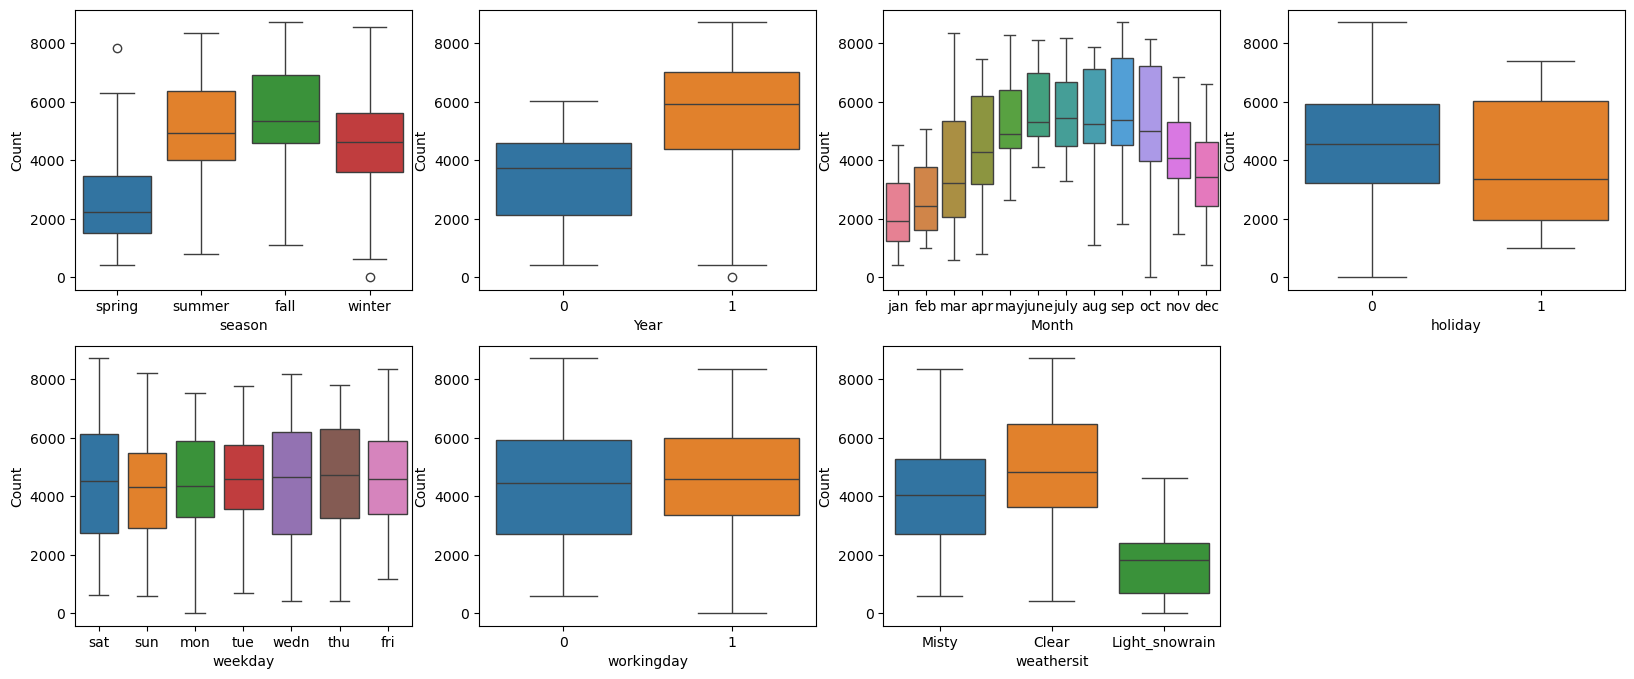

In [34]:
plt.figure(figsize=(20, 8))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='Count', hue='season', legend=False, data=bike_df)

plt.subplot(2,4,2)
sns.boxplot(x='Year', y='Count', hue='Year', legend=False, data=bike_df)

plt.subplot(2,4,3)
sns.boxplot(x='Month', y='Count', hue='Month', legend=False, data=bike_df)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='Count', hue='holiday', legend=False, data=bike_df)

plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='Count', hue='weekday', legend=False, data=bike_df)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='Count', hue='workingday', legend=False, data=bike_df)

plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='Count', hue='weathersit', legend=False, data=bike_df)

plt.show()

Insight: There are no much outliers, so no records needs to be removed.

#### Bivariate Analysis
 - Understanding how change in one variable affect the other.
 - Data has two years 2018 and 2019 will compare with all category variables

In [37]:
def plot_barchart(xcolumn):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x=xcolumn, y='Count', hue=xcolumn, data=bike_df)
    plt.subplot(1,2,2)
    sns.barplot(x=xcolumn, y='Count', hue='Year', data=bike_df)
    plt.legend(labels=['2018', '2019'])
    plt.show()

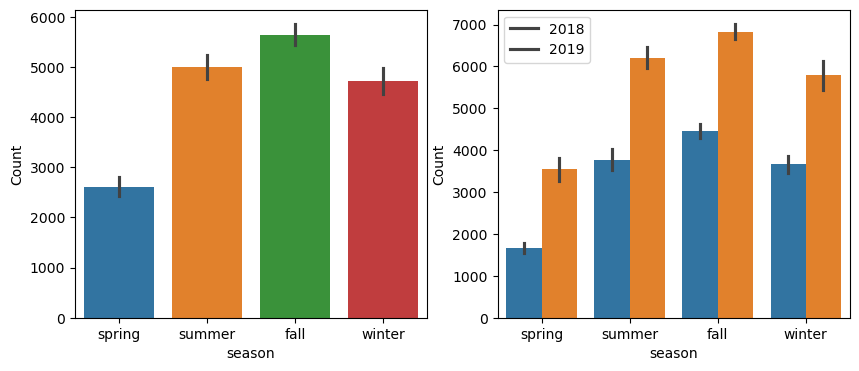

In [38]:
plot_barchart('season')

Insight: More bikes are rented in 2019 than 2018 in all seasons

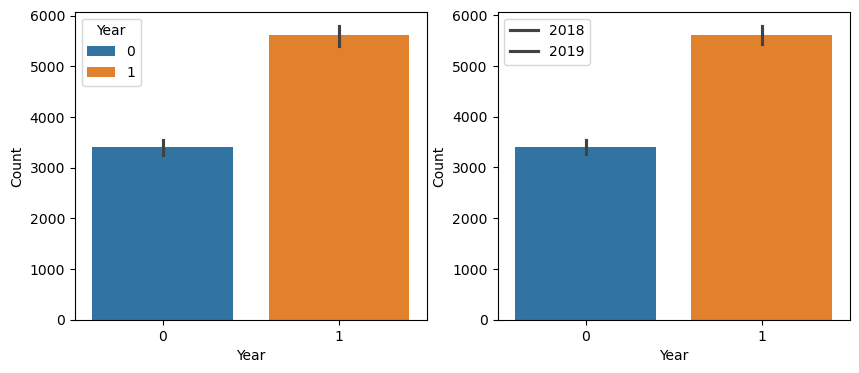

In [40]:
plot_barchart('Year')

Insight: More bikes are rented in 2019 than 2018

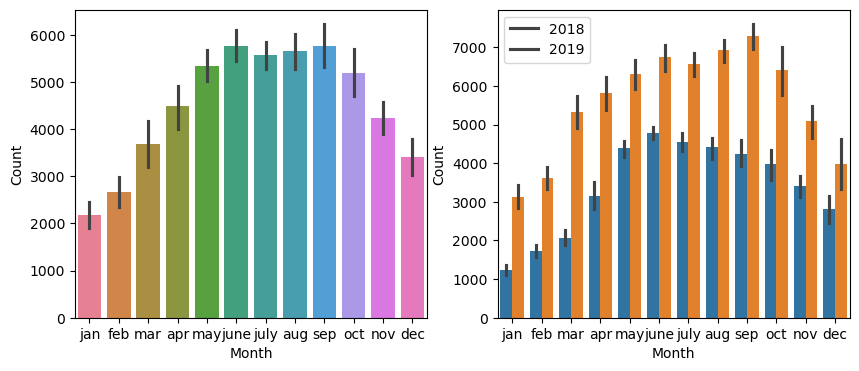

In [42]:
plot_barchart('Month')

Insight: More bikes are rented in 2019 than 2018 in all months

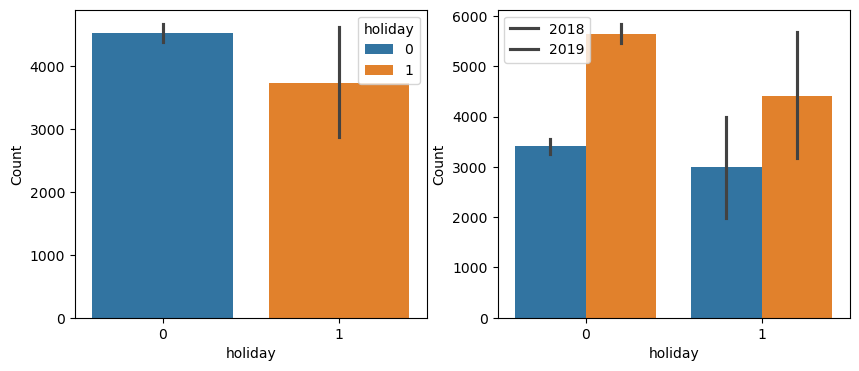

In [44]:
plot_barchart('holiday')

Insight: More bikes are rented in 2019 than 2018 in holiday

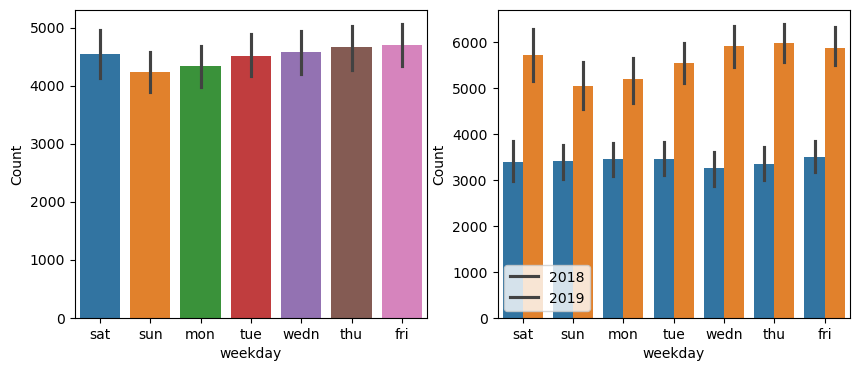

In [46]:
plot_barchart('weekday')

Insight: More bikes are rented in 2019 than 2018 in all weekdays

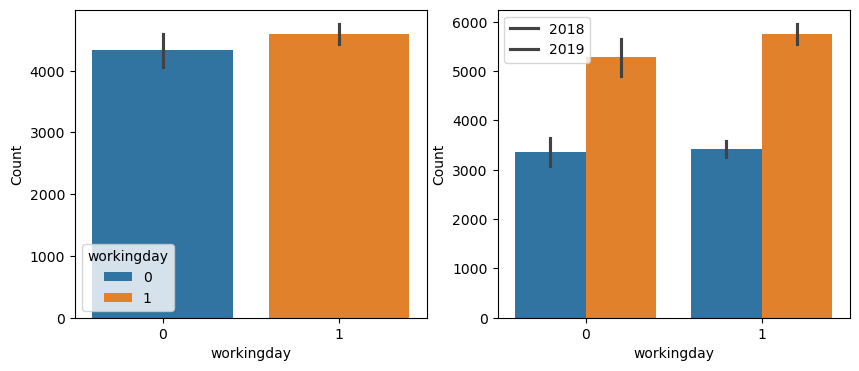

In [48]:
plot_barchart('workingday')

Insight: More bikes are rented in 2019 than 2018 in all workingdays

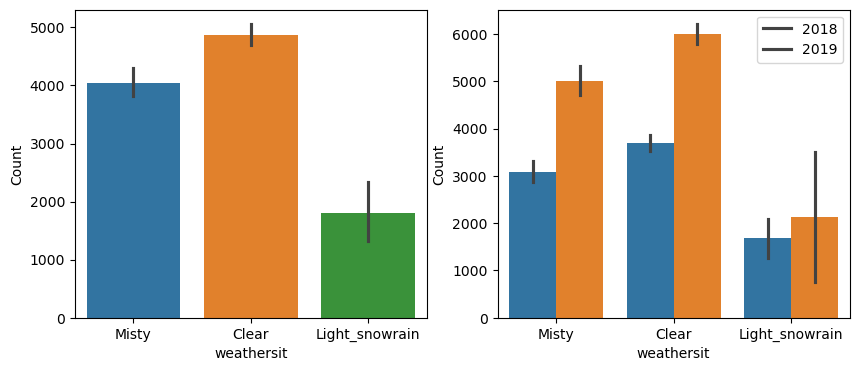

In [50]:
plot_barchart('weathersit')

Insight: More bikes are rented in 2019 than 2018 in all weather conditions

Insight: Overall 2019 is dominating over 2018 in all independent features.

#### Numarical Variables Analysis


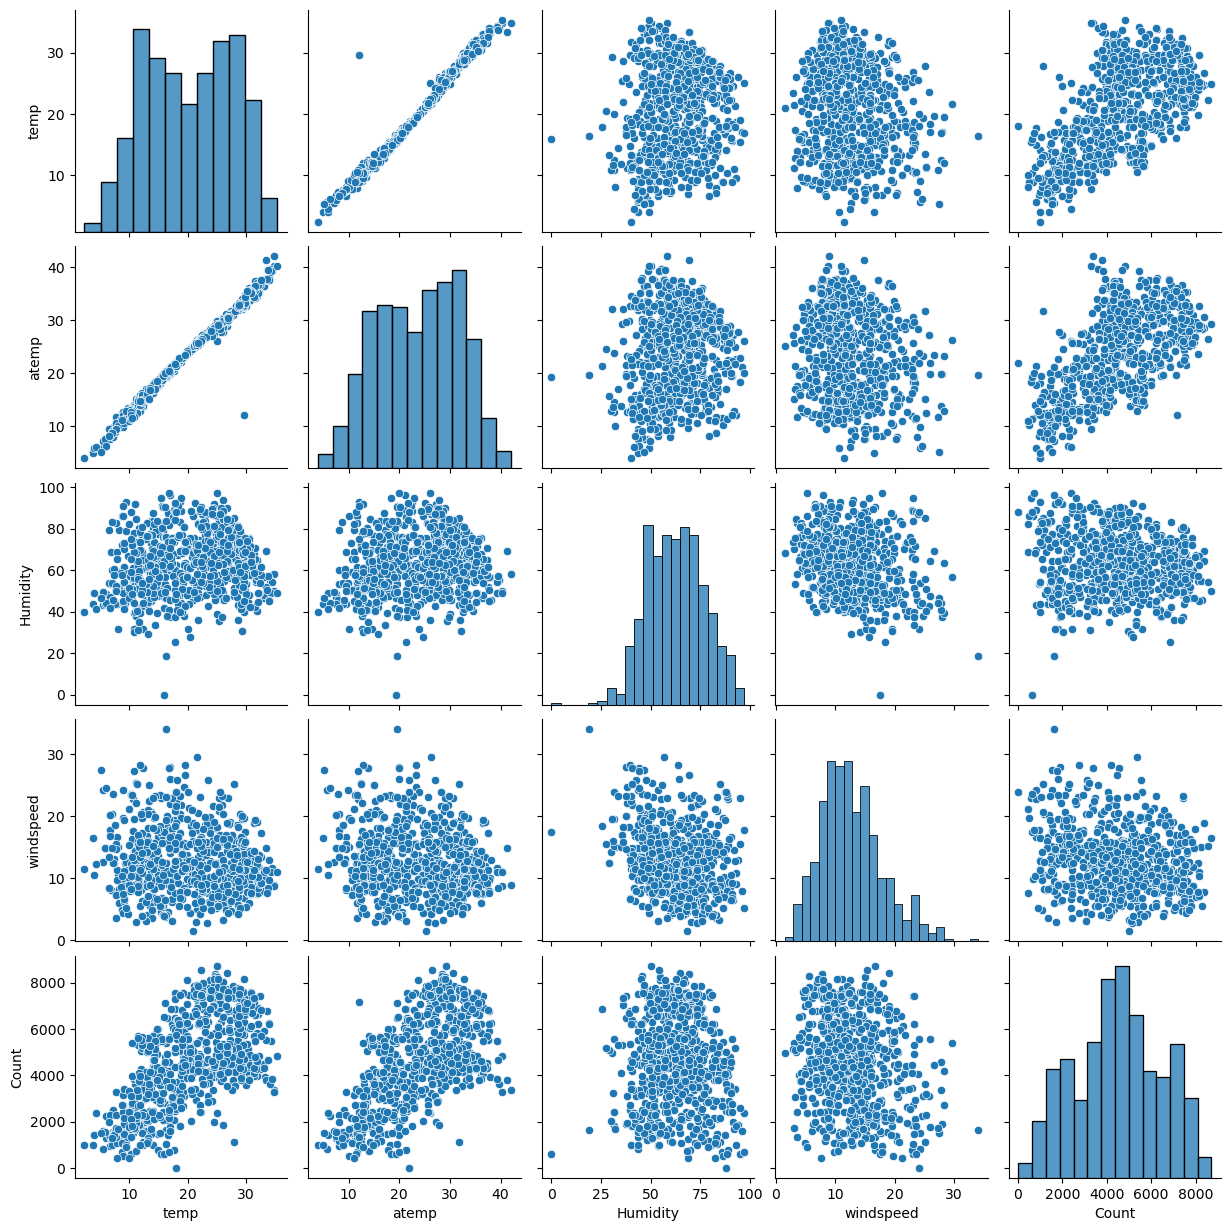

In [54]:
sns.pairplot(data=bike_df,vars=['temp','atemp','Humidity','windspeed','Count'])
plt.show()

Insight: As we can see how data points are distributed. 
There is an increase in rentals during temp 20-30 celcius, atemp 25-30 celcius, humidity 35 - 90.
Windspeed is not affecting much for rentals upto 20.

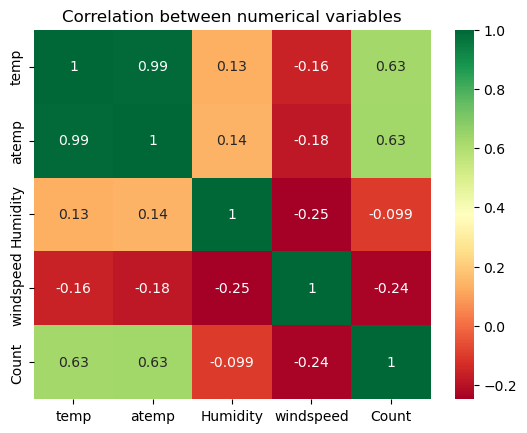

In [56]:
sns.heatmap(bike_df[['temp', 'atemp', 'Humidity', 'windspeed', 'Count']].corr(),annot = True, cmap="RdYlGn")
plt.title('Correlation between numerical variables')
plt.show()

Insight: linear relationship between temp and atemp. 
 - One can be dropped for the model based on p-value and VIF value to avoid multicollinearity

### Data Preparation

In [59]:
def create_append_dummies(colName, df):
    var_dummy = pd.get_dummies(df[colName], drop_first=True, dtype=int)
    df = pd.concat([df, var_dummy], axis=1)
    df.drop([colName], axis = 1, inplace = True)
    return df;

In [60]:
columns = ['season', 'Month', 'weekday', 'weathersit']
for column in columns:
    bike_df = create_append_dummies(column, bike_df)

In [61]:
bike_df.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
bike_df.shape

(730, 30)

In [63]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   Humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   Count           730 non-null    int64  
 8   spring          730 non-null    int32  
 9   summer          730 non-null    int32  
 10  winter          730 non-null    int32  
 11  aug             730 non-null    int32  
 12  dec             730 non-null    int32  
 13  feb             730 non-null    int32  
 14  jan             730 non-null    int32  
 15  july            730 non-null    int32  
 16  june            730 non-null    int32  
 17  mar             730 non-null    int

### Data Split: Training and Testing Data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [67]:
bike_df_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


Insight: As we can see here, some columns like temp, atemp, humidity, windspeed, Count are needs to be normalized to build the consistent model. 

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
# Rescaling the features:
scaler = MinMaxScaler()

In [71]:
# Applying scaler to columns which are not in range 0/1 

num_vars = ['temp','atemp','Humidity','windspeed','Count']
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [72]:
# Verifying:
bike_df_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


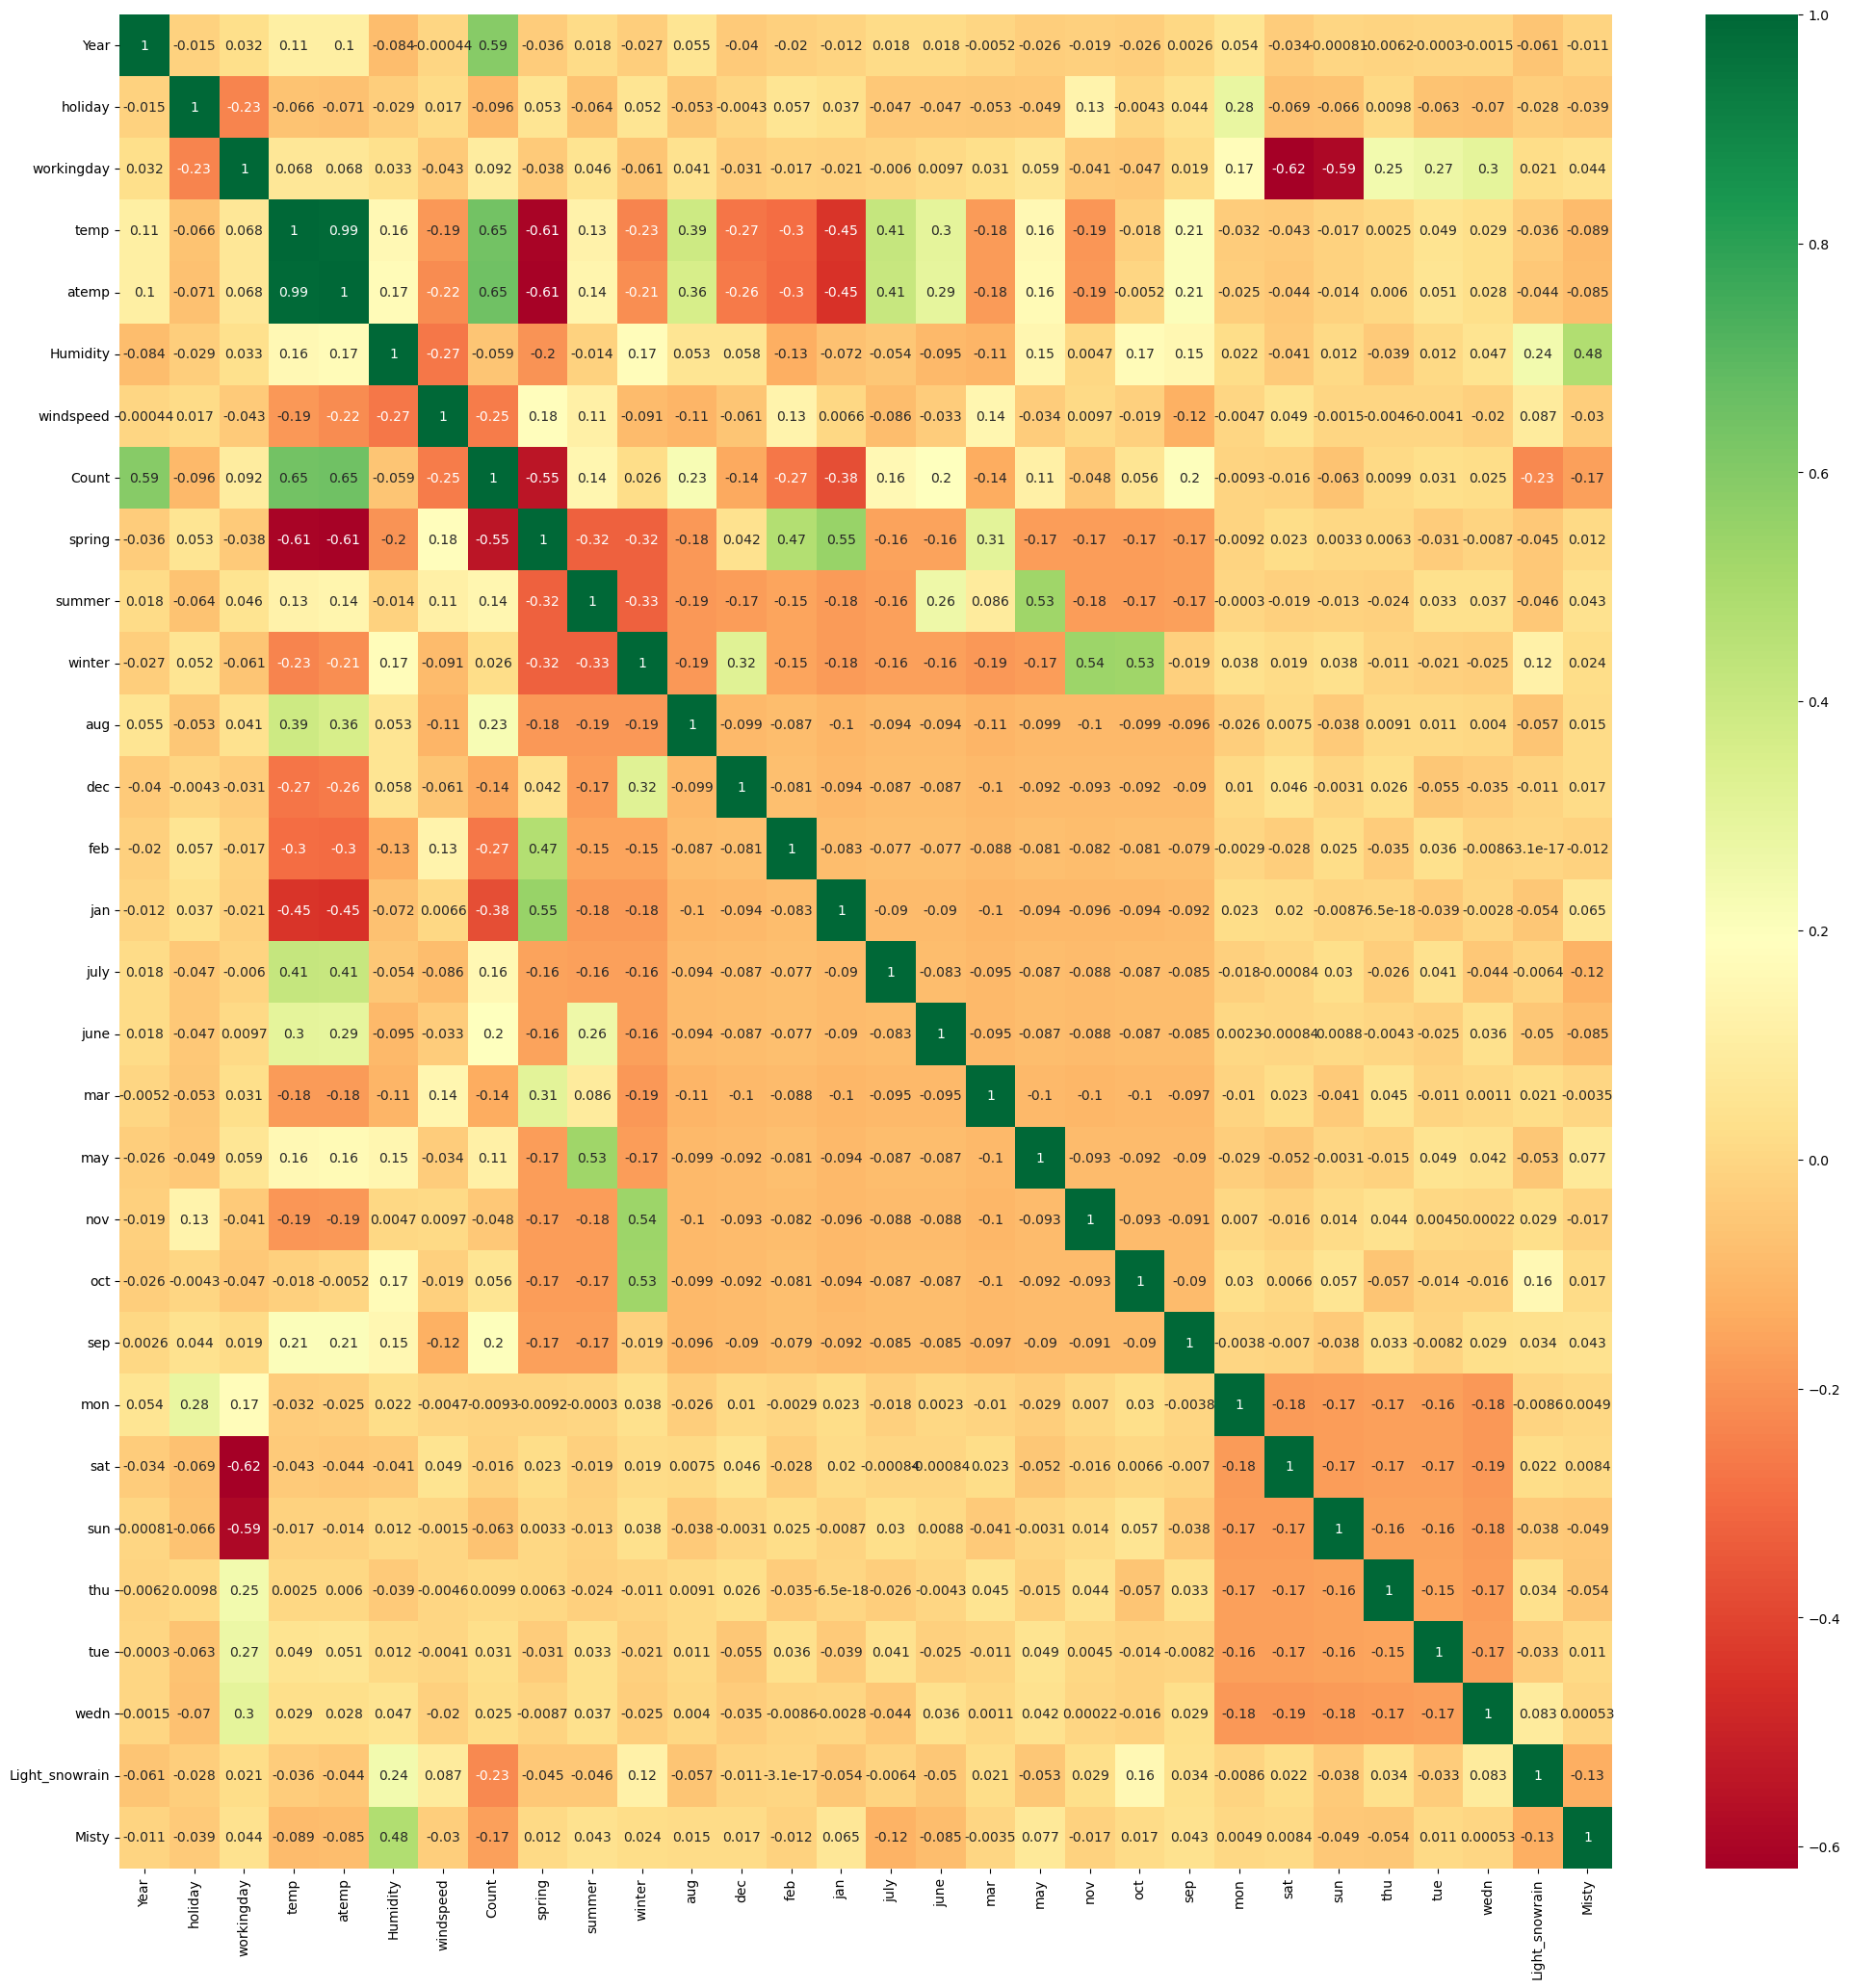

In [73]:
# Verifying which variables are highly correlated.

plt.figure(figsize = (25,25))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

Insight: Count have a correlation with temp and atemp. 
 - May month in summer season have a good correlation.
 - Oct and Nov in winter season have a good correlation.
 - Jan and Feb in spring season showing good correlation.

#### Building the Linear Model:

In [76]:
y_train = bike_df_train.pop('Count')
X_train = bike_df_train

Removing features using Recursive feature eliminator:

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

In [79]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [80]:
# verifying list of features selected by the RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wedn', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [81]:
selectedColumns = X_train.columns[rfe.support_]

In [82]:
print(selectedColumns)

Index(['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed',
       'spring', 'summer', 'winter', 'jan', 'july', 'sep', 'sat',
       'Light_snowrain', 'Misty'],
      dtype='object')


In [83]:
# prepare data frame with only selected columns

X_train_rfe = X_train[selectedColumns]

Calculating VIF for train data frame with selected columns

In [85]:
import statsmodels.api as sm

##### Building first linear model

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          4.22e-191
Time:                        18:14:56   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Misty,2.29
0,Year,2.09
12,sat,1.98


Insight: Humidity showing high VIF, can be dropped

In [91]:
X_train_new = X_train_rfe.drop(['Humidity'], axis = 1)

##### Second linear model

In [93]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.60e-188
Time:                        18:14:56   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,Year,2.08
7,winter,1.98
11,sat,1.97
8,jan,1.62
9,july,1.59


Inisght: holiday showing high P-Value we can drop

In [96]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)

##### Third linear model

In [98]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          8.68e-189
Time:                        18:14:56   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.33
0,Year,2.08
6,winter,1.91
10,sat,1.84
7,jan,1.62
8,july,1.59


Insight: jan showing slightly high P-Value, we can remove

In [101]:
X_train_new = X_train_new.drop(['jan'], axis = 1)

##### Fourth Linear Model

In [103]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          7.12e-189
Time:                        18:14:56   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,spring,2.38
5,summer,2.32
0,Year,2.07
6,winter,1.91
9,sat,1.83
7,july,1.58
11,Misty,1.57


Insight: july has high P-Value, we can remove it

In [106]:
X_train_new = X_train_new.drop(['july'], axis = 1)

##### Fifth Linear Model

In [108]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.42e-188
Time:                        18:14:56   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,spring,2.30
0,Year,2.07
5,summer,2.00
8,sat,1.83
6,winter,1.76
10,Misty,1.57
7,sep,1.23


Insight: VIF value is still higher than 5, next high p value is spring. we can remove and check

In [111]:
X_train_new = X_train_new.drop(['spring'], axis = 1)

Sixth Linear Model

In [113]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          3.13e-188
Time:                        18:14:57   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,Year,2.02
7,sat,1.69
4,summer,1.57
9,Misty,1.53
5,winter,1.40
6,sep,1.20
8,Light_snowrain,1.08


Insight: All VIF values is under 5 now

From Above we can see there is very low multicollinearity in the model. 
 - R Square shows 83% variance, which is good to consider.
 - F statistics is 253.0 which is greater than 1.
 - Probability F statistics 3.13e-188 is almost 0.


Overall states that model is significant.     

### Residual Analysis

To evaluate quality of the model, will examine difference between actual observed value and predicted value

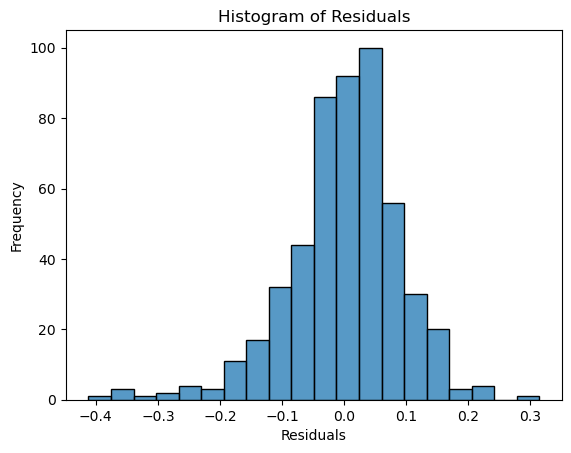

In [119]:
# Distributaion of Residuals
sns.histplot(lr_6.resid, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

Insights: Above histogram shows residuals / error terms are normally distributed. This is good indication of appropriate model.

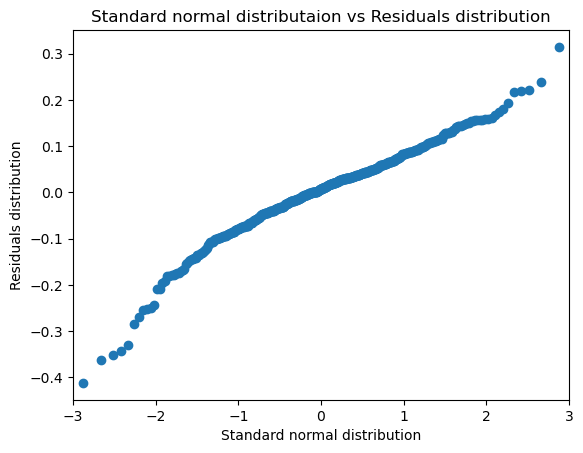

In [121]:
sm.qqplot(lr_6.resid)
plt.title("Standard normal distributaion vs Residuals distribution")
plt.xlabel("Standard normal distribution")
plt.ylabel("Residuals distribution")
plt.show()

Insights: Data points are falling approximately on the stright line, means residuals are normally distributed

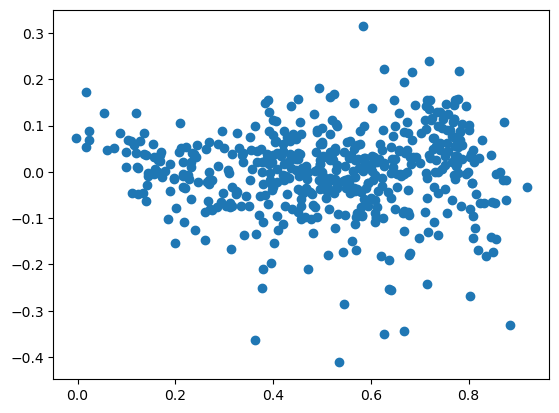

In [123]:
plt.scatter(lr_6.fittedvalues, lr_6.resid)
plt.show()

Insights: Residuals are randomly scattered around 0 and there is no pattern observed, good indication of model is appropriate. 

#### Independence of Residuals

Insight: Durbin Watson value in final model lr_6 is 2.089. Indicates there is no autocorrelation. 

### Predictions on test data

In [128]:
bike_df_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [129]:
bike_df_test.shape

(220, 30)

##### Scaling numeric variables of test data

In [131]:
numeric_vars = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

bike_df_test[numeric_vars] = scaler.transform(bike_df_test[numeric_vars])

In [132]:
bike_df_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wedn,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [211]:
y_test = bike_df_test.pop('Count')
X_test = bike_df_test

##### Now we need only columns which train model has

In [214]:
X_test = X_test[X_train_new.columns]

In [216]:
X_test.head()

,Year,workingday,temp,windspeed,summer,winter,sep,sat,Light_snowrain,Misty
184,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1,1,0.901354,0.153728,1,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,0,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0,0


In [218]:
X_test_lm_6  = sm.add_constant(X_test)

In [220]:
y_test_pred = lr_6.predict(X_test_lm_6)

In [223]:
from sklearn.metrics import r2_score

In [231]:
r2 = r2_score(y_test, y_test_pred)
round(r2, 4)

0.7961

#### Adjusted R2 square

In [259]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


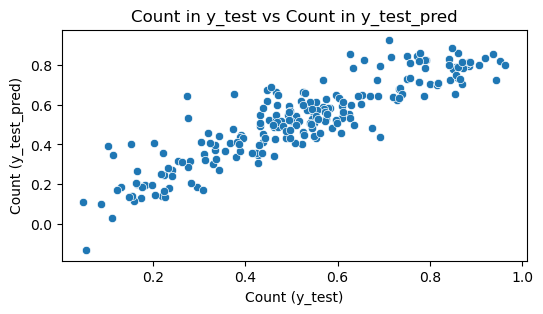

In [256]:
plt.figure(figsize = (6,3))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title("Count in y_test vs Count in y_test_pred")
plt.xlabel("Count (y_test)")
plt.ylabel("Count (y_test_pred)")
plt.show()

Insight: R2 score is 0.7961 approximately equals to 0.8.
 - R2 squared value from train data set 0.83
 - R2 squared value from test data set is 0.8
 - Adjusted R2 squared value from train data set is 0.832
 - Adjusted R2 squared value from test data set is 0.7864

So R2 squared and Adjusted R2 squared from train and test set are very close, so prediction is appropriate

In [264]:
round(lr_6.params, 2) 

const             0.08
Year              0.23
workingday        0.06
temp              0.55
windspeed        -0.16
summer            0.09
winter            0.13
sep               0.10
sat               0.07
Light_snowrain   -0.29
Misty            -0.08
dtype: float64

#### Year, workingday, temp, windspeed, summer, winter, sep, sat, Light_snowrain, Misty are influencing bike rental demand